In [1]:
import pathlib
import numpy as np
import pandas as pd
import networkx as nx
from src.table_to_graph.table_to_graph import graph_to_subgraphs

c:\users\luka\desktop\faks\2.letnik_magisterij\mlg-machine-learning-with-graphs\graphs-for-synthetic-relational-data-generation\src\table_to_graph\table_to_graph.py:36: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv(pathlib.Path(dir_path) / "train.csv") if train else pd.read_csv(pathlib.Path(dir_path) / "test.csv")


## Rossmann

In [2]:
from src.table_to_graph.table_to_graph import (
    ROSSMANN_GRAPH, ROSSMANN_ROOT_NODES,
    ROSSMANN_TEST_GRAPH, ROSSMANN_TEST_ROOT_NODES
)

In [3]:
rossmann_train_graphs = graph_to_subgraphs(ROSSMANN_GRAPH, ROSSMANN_ROOT_NODES)
rossmann_test_graphs = graph_to_subgraphs(ROSSMANN_TEST_GRAPH, ROSSMANN_TEST_ROOT_NODES)

print(f"Number of nodes in train: {len(ROSSMANN_GRAPH.nodes)}\nNumber of nodes in test: {len(ROSSMANN_TEST_GRAPH.nodes)}")
print(f"Number of graphs in train: {len(rossmann_train_graphs)}\nNumber of graphs in test: {len(rossmann_test_graphs)}")

Number of nodes in train: 1018324
Number of nodes in test: 42203
Number of graphs in train: 1115
Number of graphs in test: 856


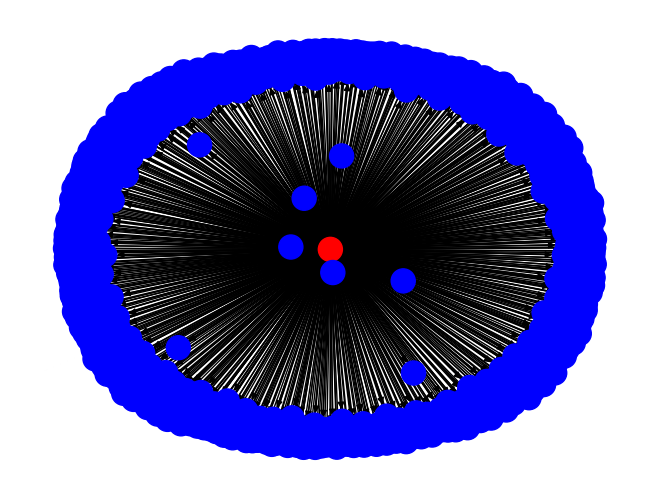

In [4]:
draw_id = 0
G_rossmann_train = rossmann_train_graphs[draw_id]
color_map = {"sale": "blue", "store": "red"}
node_colors_rossmann_train = [color_map[node[1]['y']] for node in G_rossmann_train.nodes(data=True)]

nx.draw(G_rossmann_train, node_color=node_colors_rossmann_train)

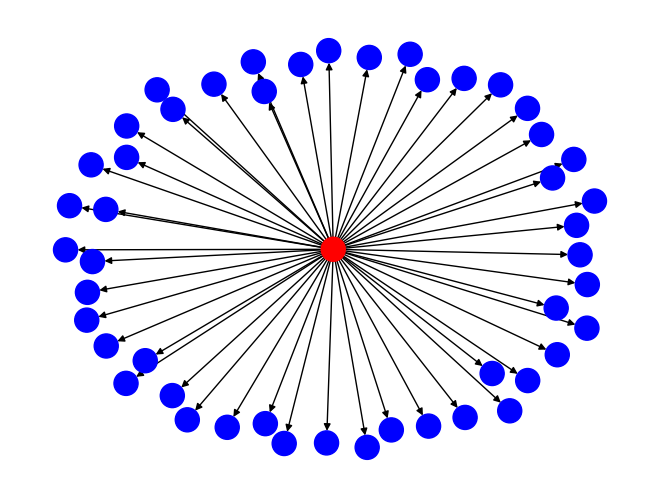

In [5]:
draw_id = 0
G_rossmann_test = rossmann_test_graphs[draw_id]
color_map = {"sale": "blue", "store": "red"}
node_colors_rossmann_test = [color_map[node[1]['y']] for node in G_rossmann_test.nodes(data=True)]

nx.draw(G_rossmann_test, node_color=node_colors_rossmann_test)

## Mutagenesis

In [6]:
from src.table_to_graph.table_to_graph import MUTAGENESIS_GRAPH, MUTAGENESIS_ROOT_NODES

In [7]:
mutagenesis_graphs = graph_to_subgraphs(MUTAGENESIS_GRAPH, MUTAGENESIS_ROOT_NODES)

print(f"Number of nodes in mutagenesis: {len(MUTAGENESIS_GRAPH.nodes)}")
print(f"Number of graphs in mutagenesis: {len(mutagenesis_graphs)}")

Number of nodes in mutagenesis: 10324
Number of graphs in mutagenesis: 188


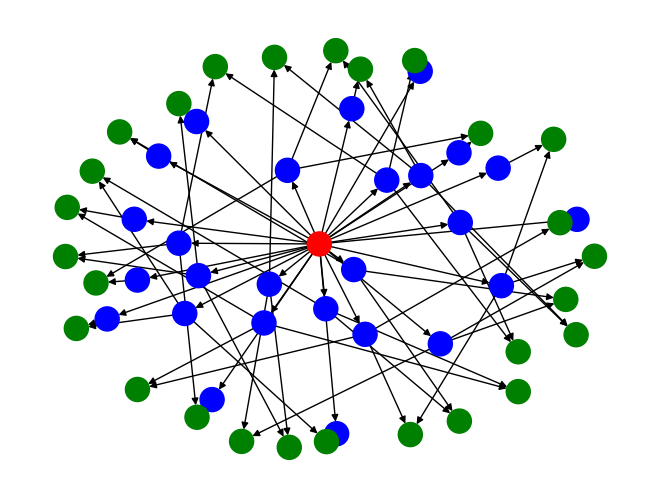

In [25]:
draw_id = 0
G_mutagenesis = mutagenesis_graphs[draw_id]
color_map = {"molecule": "red", "atom": "blue", "bond": "green"}
node_colors_mutagenesis = [color_map[node[1]['y']] for node in G_mutagenesis.nodes(data=True)]

nx.draw(G_mutagenesis, node_color=node_colors_mutagenesis)

## Combine plots

In [9]:
import matplotlib.pyplot as plt

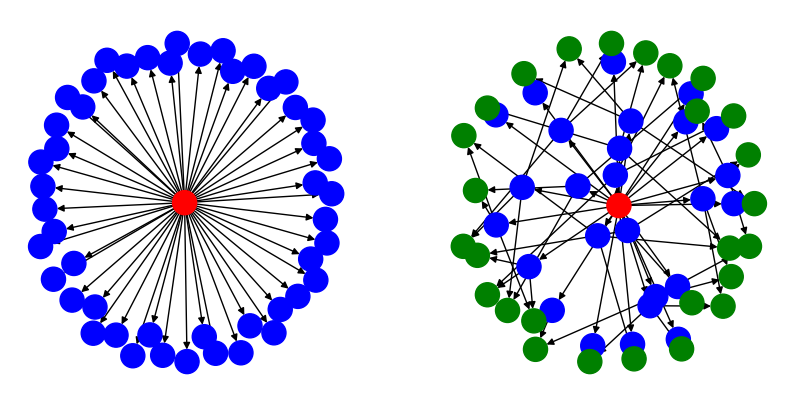

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
nx.draw(G_rossmann_test, node_color=node_colors_rossmann_test, ax=ax[0])
nx.draw(G_mutagenesis, node_color=node_colors_mutagenesis, ax=ax[1])